<a href="https://colab.research.google.com/github/pdoren/Machine-Learning-G105/blob/main/Desaf%C3%ADo_Introducci%C3%B3n_al_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba - Análisis estadístico con Python

**Nombre**: Pablo Saavedra <br />
**Curso**: Machine Learning (G105)


---

## Parte I

1. ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no supervisado?

    > **Resp**: Aunque en ambos aprendizajes se requieren datos de entrada, en el aprendisaje supervisado se requieren ejemplos (tupla entre datos de entrada y salida esperada dado los datos de entrada) para poder entrenar los modelos, el objetivo del entrenamiento es que el modelo aprenda a responder de forma similar a los ejemplos (p. ej.: clasificadores y regresiones). Mientras que en el aprendizaje no supervisado no se requieren ejemplos, lo que busca el entrenamiento es buscar relaciones o información contenida entre los datos de entrada (p. ej.: clustering).

2. En la industria de la salud, a menudo se utiliza el machine learning para predecir la probabilidad de enfermedades o condiciones médicas en función de diferentes variables de entrada, como síntomas, antecedentes médicos y factores de estilo de vida. Imagina que tienes un conjunto de datos que contiene información de pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?

    > **Resp**: Utilizaría aprendizaje supervisado en donde utilizaría como datos de entrada la información del paciente (síntomas, antecedentes médicos y factores de estilo de vida) y su diagnóstico como la salida del modelo (enfermo/no enfermo).

3. ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?

    > **Resp**: Es necesario para evaluar la efectivida del modelo (presición y capacidad de generealización). Se divide el conjunto de datos en 2: entrenamiento y prueba. Sino se realizara esta división de los datos no sería posible realizar la evaluación del modelo. Ambos conjuntos deben ser representativos para mejorar la generalización (modelo pueda predecir datos nuevos que no fueron utilizados en el entrenamiento).
    >
    > - Conjunto de Entrenamiento: Este conjunto permite entrenar el modelo, es decir, actualizar los parámetros internos del mismo.
    > - Conjunto de Prueba: Con este conjunto se evaluan las capacidades del modelo para predecir y generalizar.

4. ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un enfoque estadístico y un enfoque de aprendizaje de máquinas?

    > **Resp**: En el enfoque estadístico se busca las relaciones estadísticas entre las variables de entrada y salida. En el caso del enfoque de aprendizaje de máquinas se busca la capcidad de predicción y generalización del modelo.  

5. Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc). Menciona al menos 1 aplicación en esa industria de:

    > **Área de interés: Salud**

    > a. Aprendizaje Supervisado (Clasificación)
    >
    >  - **Resp**: Clasificador Triaje en donde los enfermos que llegan a un centro de salud son clasficados en 5 grupos de salida (5 clases como datos de salida) según los síntomas y antecedentes médicos evaludados en el ingreso (datos de entrada).  

    > b. Aprendizaje Supervisado (Regresión)
    >
    >  - **Resp**: Generar un modelo de regresión para predecir la cantidad de casos de algún virus estacional en la población a partir de datos historicos (ejempos).

    > c. Aprendizaje No Supervisado (Clustering)
    >
    >  - **Resp**: Tomar información de personas en un hospital para encontrar relaciones entre ellas, por ejemplo: dado un brote de alguna infección determinar cual es la relación existente entre los enfermos y no enfermos.

    > d. Aprendizaje No Supervisado (Reducción de dimensionalidad)
    >
    >  - **Resp**: Realizar un análisis de reducción de dimensionalidad entre varios exámenes para determinar cuales son los exámenes que mejor explican alguna enfermedad y cuales son marginales. De esa forma se podría evitar hacer exámenes que no aportan en el diagnóstico.

## PARTE II

6. Carga los datos de la base data_housing.csv e importa las librerías necesarias para
cargar los datos en un DataFrame, manipularlos, hacer cálculos, analizarlos y
construir modelos de regresión lineal. Utiliza Pandas, NumPy y Scikit-learn.

### Importación de librerías

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as st
import math
import statsmodels.api as sm

pd.options.display.float_format = "{:,.2f}".format   # Visualizar 2 decimales

### Carga de datos

In [13]:
df = pd.read_excel('/content/drive/MyDrive/data-housing.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   guestroom        545 non-null    object
 6   hotwaterheating  545 non-null    object
 7   airconditioning  545 non-null    object
 8   parking          545 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.4+ KB


### Análisis

In [14]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


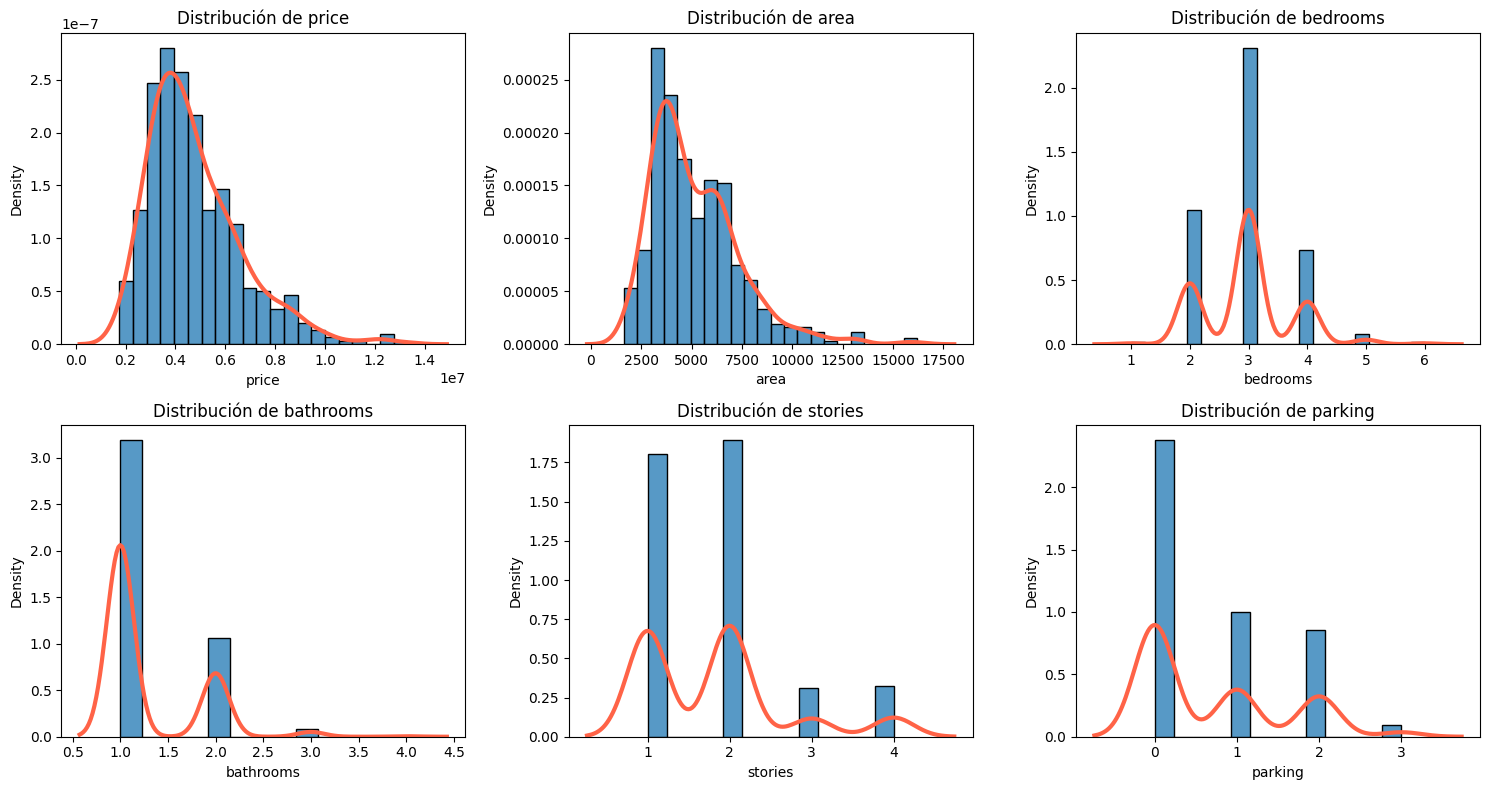

In [15]:
variables_cuantitativas = df.select_dtypes(include=['number']).columns.tolist()
variables_categoricas = df.select_dtypes(exclude=['number']).columns.tolist()

def plot_hist(_df: pd.DataFrame, _num_cols: list, _n_cols: int = 3):
  total = len(_num_cols)
  n_rows = int(np.ceil(total / _n_cols))

  fig, axes = plt.subplots(n_rows, _n_cols, figsize=(5*_n_cols, 4*n_rows))
  axes = axes.flatten()  # Para iterar fácil

  for i, col in enumerate(_num_cols):
      sns.histplot(data=_df[col], kde=False, stat='density', ax=axes[i])
      sns.kdeplot(data=_df[col], color='tomato', lw=3, ax=axes[i])
      axes[i].set_title(f"Distribución de {col}")

  # Eliminar ejes vacíos si sobran
  for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

plot_hist(df, variables_cuantitativas)

Los datos de de precio y área son continuos y presentan centradas en sus respectivas medias. Sin embargo, las demás variables cuantitativas presentan datos discretos.

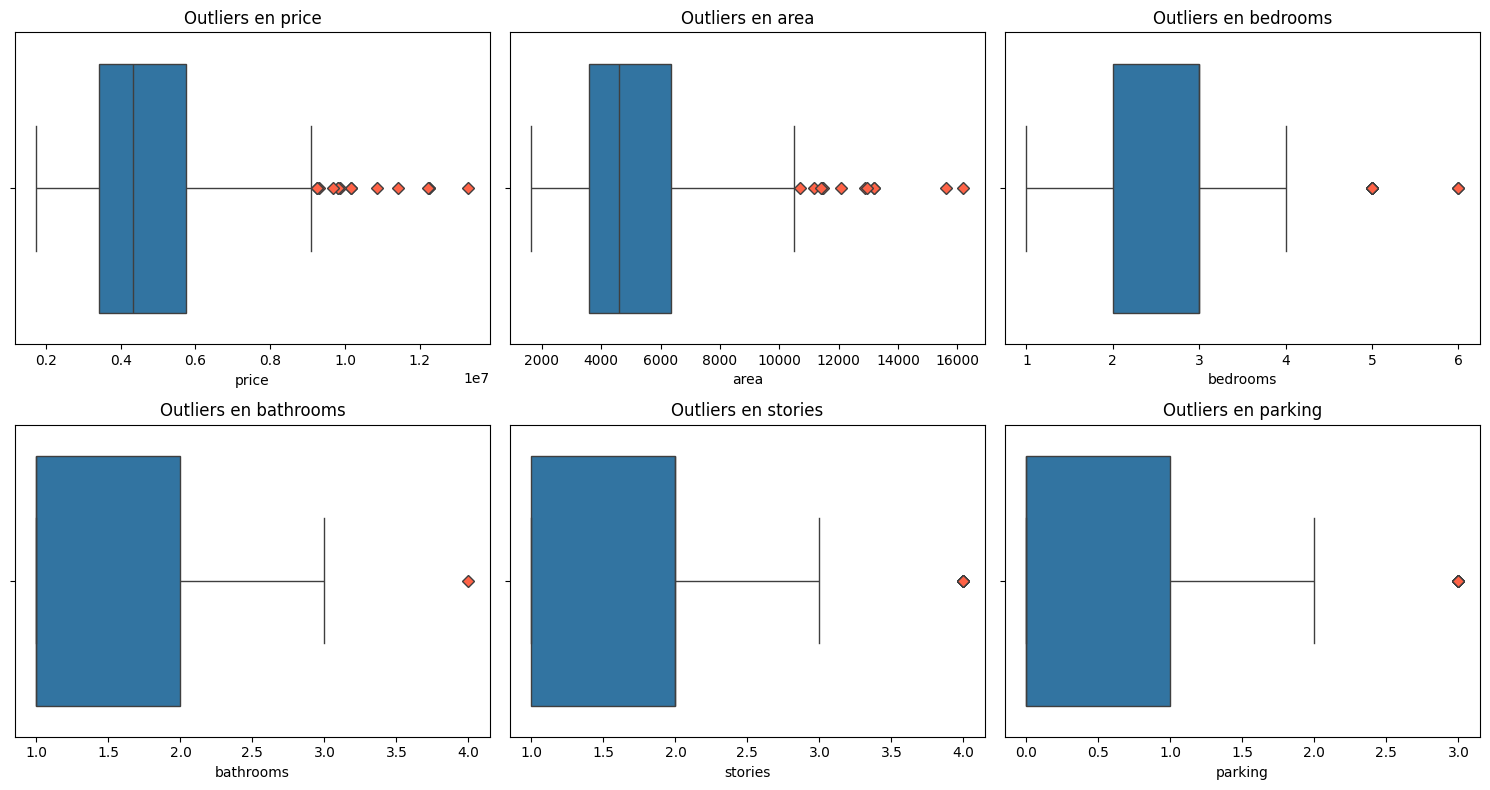

In [47]:
def plot_outliers(_df: pd.DataFrame, _num_cols: list, _n_cols: int = 3):
  total = len(_num_cols)
  n_rows = int(np.ceil(total / _n_cols))

  fig, axes = plt.subplots(n_rows, _n_cols, figsize=(5*_n_cols, 4*n_rows))

  if isinstance(axes, np.ndarray):
      axes = axes.ravel()
  else:
      axes = np.array([axes])

  for i, col in enumerate(_num_cols):
      sns.boxplot(x=_df[col], flierprops = {'markerfacecolor':'tomato', 'marker':'D'}, ax=axes[i])
      axes[i].set_title(f"Outliers en {col}")
      axes[i].set_xlabel(col)

  # Eliminar ejes vacíos si sobran
  for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

plot_outliers(df, variables_cuantitativas)


Los datos cuantitativos presentan pocos outliers en las variables discretas (bedrooms, bathrooms, stories, parking), por lo tanto, no es necesario limpiar. No pasa lo mismo con las variables continuas.

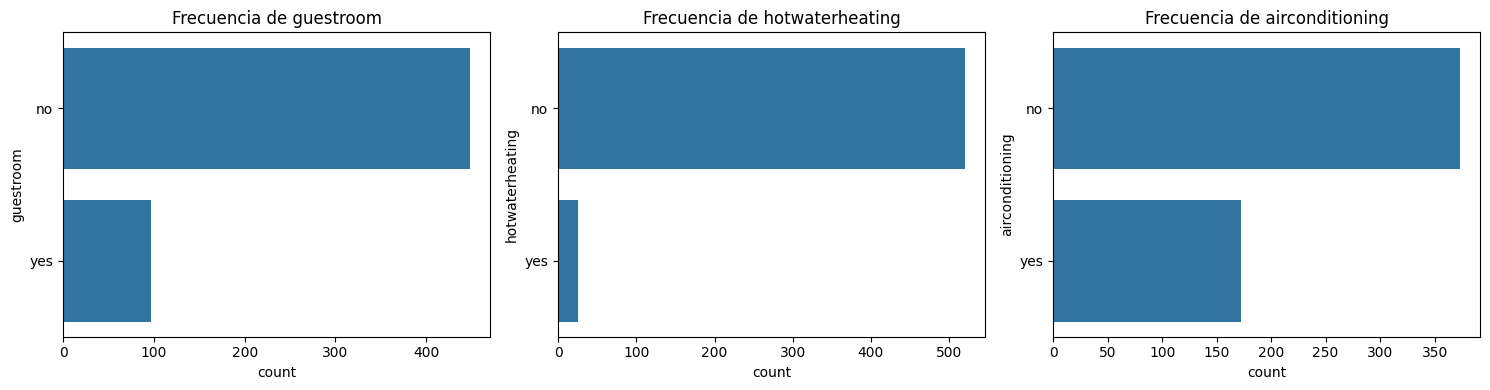

In [20]:
def plot_count(_df: pd.DataFrame, _num_cols: list, _n_cols: int = 3):
  total = len(_num_cols)
  n_rows = int(np.ceil(total / _n_cols))

  fig, axes = plt.subplots(n_rows, _n_cols, figsize=(5*_n_cols, 4*n_rows))
  axes = axes.flatten()  # Para iterar fácil

  for i, col in enumerate(_num_cols):
      sns.countplot(y=col, data=_df, order=_df[col].value_counts().index, ax=axes[i])
      axes[i].set_title(f"Frecuencia de {col}")

  # Eliminar ejes vacíos si sobran
  for j in range(i+1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

plot_count(df, variables_categoricas)

En cuanto a las variables categóricas, estas presentan una frecuencia mucho mayor a la no existencia de las características representadas por la variable (guestroom, hotwaterheating y airconditioning)

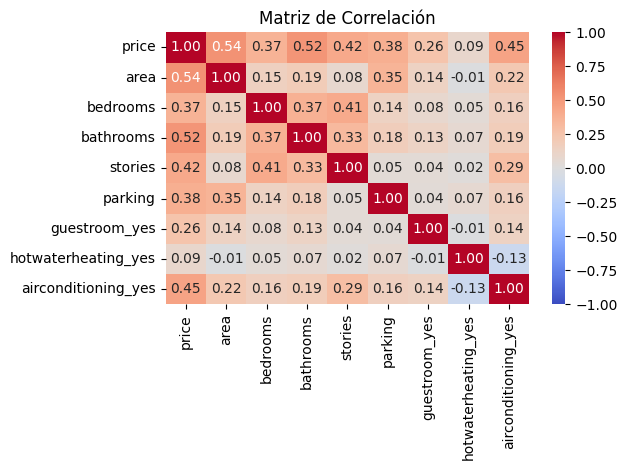

In [63]:
# Transformar las variables categóricas
df_transform = pd.get_dummies(df, drop_first=True).astype('int')

matriz_correlacion = df_transform.select_dtypes(include="number").corr()
matriz_correlacion_sin_volumen = df_transform.select_dtypes(include="number").corr()

sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f",vmin=-1, vmax=1)
plt.title("Matriz de Correlación")

plt.tight_layout()
plt.show()

No existen grandes correlaciones entre las demás variables y el precio. Las correlaciones más altas respecto al precio son: area y bathrooms

### Modelo

Se realizará 2 modelos de regresión utilizando el área y los baños y otro modelo usando todas las variables

In [55]:
# Dividir los datos de ejemplo en entrada y salida para el modelo de regresión
X = df_transform.drop(['price'], axis=1)
y = df_transform.loc[:,['price']]

Modelos de regresión estadística

In [71]:
def eval_modelo_regr(_X, _y):
  X_const = sm.add_constant(_X)  # agrega intercepto
  modelo = sm.OLS(_y, X_const).fit()

  print(modelo.summary())

  r2 = modelo.rsquared
  params = modelo.params          # [const, beta_X]
  rmse = np.sqrt(mean_squared_error(_y, modelo.fittedvalues))

  print('\n')
  print('============================================')
  print('======== Resumen modelo OLS (Y ~ X) ========')
  str_params = ' + '.join([f'{params.iloc[i]:.3f}·{X.columns[i-1]}' for i in range(1, len(params))])
  print(f"Ecuación:  Y = {params.iloc[0]:.3f} + {str_params}")
  print(f"R² = {r2:.3f} | RMSE = {rmse:.3f}")
  print('============================================')

eval_modelo_regr(X[['area', 'bathrooms']], y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     197.7
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           4.03e-64
Time:                        20:39:48   Log-Likelihood:                -7798.1
No. Observations:                 507   AIC:                         1.560e+04
Df Residuals:                     504   BIC:                         1.561e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.296e+05   1.93e+05      4.289      0.0

In [72]:
eval_modelo_regr(X, y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     99.38
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           4.09e-98
Time:                        20:39:53   Log-Likelihood:                -7703.1
No. Observations:                 507   AIC:                         1.542e+04
Df Residuals:                     498   BIC:                         1.546e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.018e+05   2

Conclusiones de los modelos:

- El modelo usandon área y baños solo explica solo un 44% de la variación del precio. El modelo con todas las variables explica el 61.5%.

- Las variables más influyentes y estadísticamente significativas son:
area y bathrooms.

- bedrooms no es significativa (p > 0.05), por lo que podría eliminarse sin afectar el ajuste.

- El error medio (RMSE ≈ 960 mil) del modelo con todas las variables sugiere una precisión razonable y es mejor que el modelo de una sola variables.

7. Genera un informe de calidad de datos de la base. Analiza la existencia de datos
atípicos, extraños o nulos. Además, analiza las posibles correlaciones entre las
variables.


Para generar el informe se generará una función

In [74]:
def data_quality_report(df: pd.DataFrame):
    n_rows = len(df)

    report = []

    for col in df.columns:
        serie = df[col]

        # métricas básicas
        dtype = serie.dtype
        missing = serie.isna().sum()
        missing_pct = (missing / n_rows) * 100

        nunique = serie.nunique(dropna=True)

        # constante / casi constante
        constant_flag = (nunique == 1)
        quasi_constant_flag = (nunique / n_rows < 0.01)  # <1% de variación

        # numéricos: métricas de rango
        if pd.api.types.is_numeric_dtype(serie):
            min_val = serie.min()
            max_val = serie.max()
            mean_val = serie.mean()

            # outliers simples con IQR
            q1 = serie.quantile(0.25)
            q3 = serie.quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 1.5 * iqr
            lower_bound = q1 - 1.5 * iqr
            outliers_mask = (serie < lower_bound) | (serie > upper_bound)
            outliers_count = outliers_mask.sum()
            outliers_pct = (outliers_count / n_rows) * 100
        else:
            min_val = None
            max_val = None
            mean_val = None
            outliers_count = None
            outliers_pct = None

        report.append({
            "columna": col,
            "tipo_dato": str(dtype),
            "faltantes": int(missing),
            "%_faltantes": round(missing_pct, 2),
            "n_unicos": int(nunique),
            "constante": constant_flag,
            "casi_constante(<1%)": quasi_constant_flag,
            "min": min_val,
            "max": max_val,
            "media": mean_val,
            "outliers_cnt": outliers_count,
            "%_outliers": None if outliers_pct is None else round(outliers_pct, 2),
        })

    report_df = pd.DataFrame(report).sort_values(
        by=["%_faltantes", "constante", "casi_constante(<1%)"],
        ascending=[False, False, False]
    ).reset_index(drop=True)

    return report_df


In [75]:
data_quality_report(df)

,columna,tipo_dato,faltantes,%_faltantes,n_unicos,constante,casi_constante(<1%),min,max,media,outliers_cnt,%_outliers
0,bathrooms,int64,0,0.00,4,False,True,1.00,4.00,1.29,1.00,0.18
1,stories,int64,0,0.00,4,False,True,1.00,4.00,1.81,41.00,7.52
2,guestroom,object,0,0.00,2,False,True,NaN,NaN,NaN,NaN,NaN
3,hotwaterheating,object,0,0.00,2,False,True,NaN,NaN,NaN,NaN,NaN
4,airconditioning,object,0,0.00,2,False,True,NaN,NaN,NaN,NaN,NaN
5,parking,int64,0,0.00,4,False,True,0.00,3.00,0.69,12.00,2.20
6,price,int64,0,0.00,219,False,False,"1,750,000.00","13,300,000.00","4,766,729.25",15.00,2.75
7,area,int64,0,0.00,284,False,False,"1,650.00","16,200.00","5,150.54",12.00,2.20
8,bedrooms,int64,0,0.00,6,False,False,1.00,6.00,2.97,12.00,2.20


Conclusiones de los datos:

- No existen valores faltantes en ninguna variable del conjunto.

- Las variables numéricas (price, area, bedrooms, bathrooms, stories, parking) presentan buena completitud y rangos coherentes con datos inmobiliarios.

- La mayoría de las variables (bathrooms, stories, guestroom, hotwaterheating, airconditioning, parking) son casi constantes (tienen baja variabilidad), lo que podría limitar su aporte predictivo en un modelo.

- price y area son las variables más informativas, con alta variabilidad y sin valores anómalos relevantes.

- Se detecta una baja proporción de outliers (<8%).

Ahora se procede a limpiar los datos de outliers

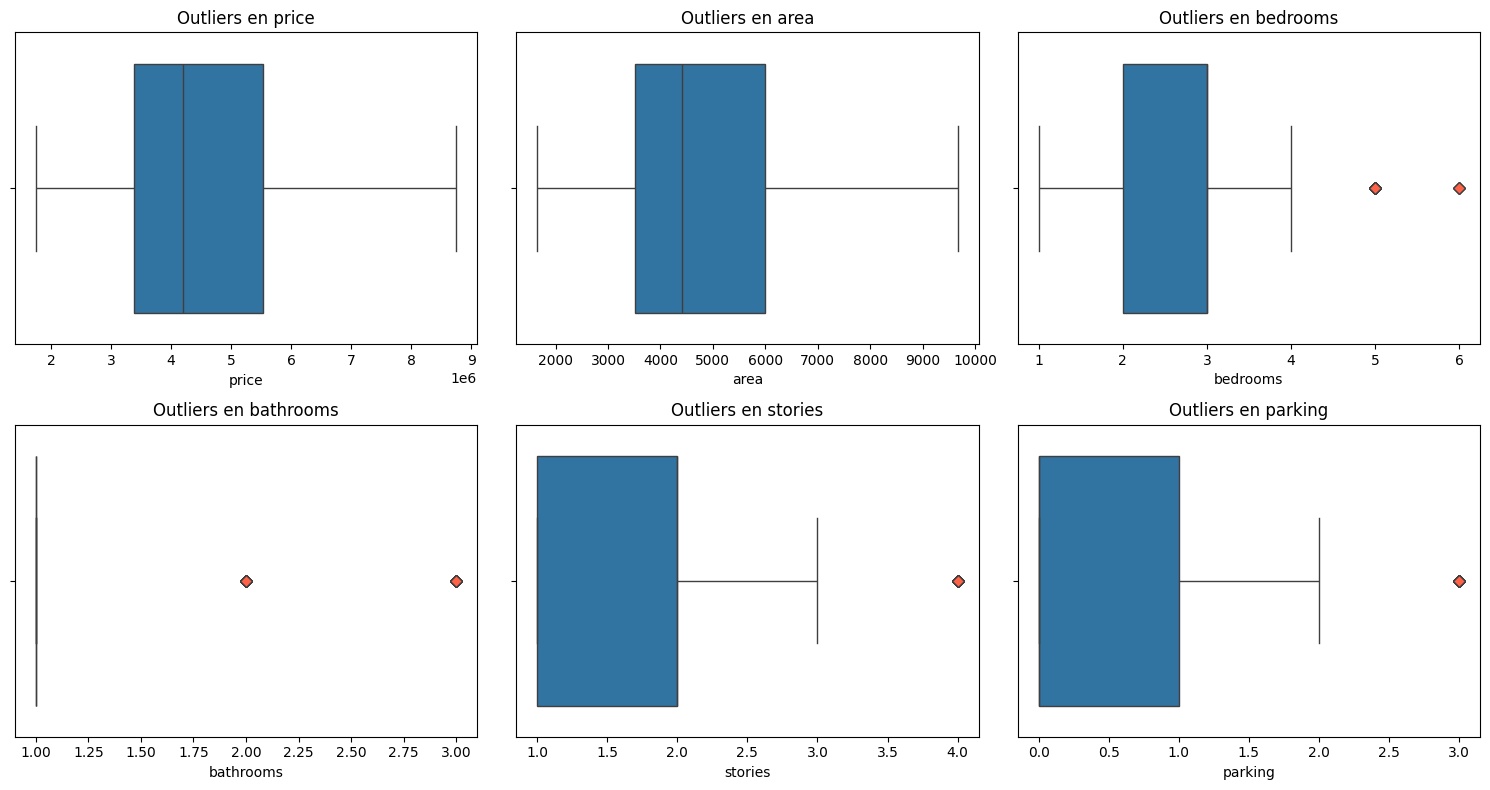

In [ ]:
def clean_outliers(_df: pd.DataFrame, _cols: list, _k: float=1.5):
  df_ret = _df.copy()
  for col in _cols:
    while True:
      q1, q3 = df_ret[col].quantile([.25, .75])
      iqr = q3 - q1
      low, high = q1 - _k * iqr, q3 + _k * iqr
      mask_out = (df_ret[col] < low) | (df_ret[col] > high)
      if mask_out.any():
        df_ret = df_ret[~mask_out]
      else:
        break
  return df_ret

df_limpio = clean_outliers(df, ['price', 'area'])

plot_outliers(df_limpio, variables_cuantitativas)

Correlaciones

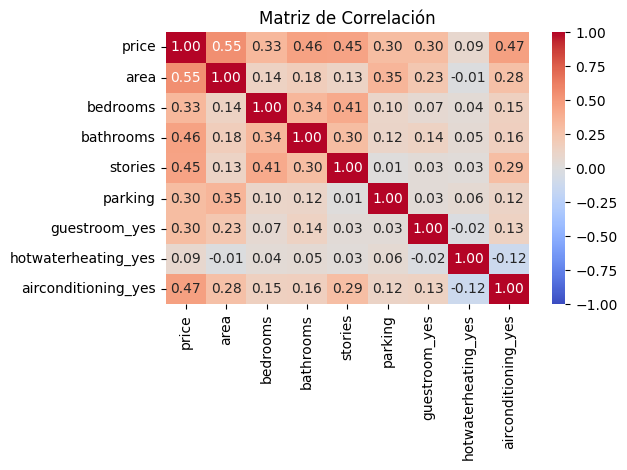

In [76]:
# Transformar las variables categóricas
df_transform = pd.get_dummies(df_limpio, drop_first=True).astype('int')

matriz_correlacion = df_transform.select_dtypes(include="number").corr()
matriz_correlacion_sin_volumen = df_transform.select_dtypes(include="number").corr()

sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f",vmin=-1, vmax=1)
plt.title("Matriz de Correlación")

plt.tight_layout()
plt.show()

Conclusiones:

- No existen grandes correlaciones entre las demás variables y el precio. lo quer indica baja multicolinealidad. Las correlaciones más altas respecto al precio son: area y bathrooms.

8. Genera un modelo de regresión lineal. Para ello:

    a. Importa el estimador de regresión lineal de Scikit-learn.

    b. Divide los datos (80% train y 20% test)

    c. Crea una instancia del modelo de regresión lineal.

    d. Ajusta el modelo utilizando los datos de entrenamiento.
    

In [81]:
# Dividir los datos de ejemplo en entrada y salida para el modelo de regresión
X = df_transform.drop(['price'], axis=1)
y = df_transform.loc[:,['price']]

# Instanciar el objeto de la regresión lineal
regr = linear_model.LinearRegression()

# Dividir los ejemplos en conjuntos de prueba (20%) y entrenamiento (80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Entrenar el objeto con el método fit
regr.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)
print("Coeficientes: \n", regr.coef_)

mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

params = regr.coef_[0]
print('\n')
print('====================================================')
print('======== Resumen modelo Regresión Líneal ML ========')
str_params = ' + '.join([f'{params[i]:.3f}·{X.columns[i-1]}' for i in range(1, len(params))])
print(f"Ecuación:  Y = {params[0]:.3f} + {str_params}")
print(f"R² = {r2:.3f} | RMSE = {mse:.3f}")
print('====================================================')

Coeficientes: 
 [[3.04570024e+02 9.17158074e+04 8.41436478e+05 4.17405333e+05
  1.82566249e+05 6.22494692e+05 6.45288330e+05 7.23216906e+05]]


======== Resumen modelo Regresión Líneal ML ========
Ecuación:  Y = 304.570 + 91715.807·area + 841436.478·bedrooms + 417405.333·bathrooms + 182566.249·stories + 622494.692·parking + 645288.330·guestroom_yes + 723216.906·hotwaterheating_yes
R² = 0.610 | RMSE = 882647336062.845


9. Evalúa el modelo. Para ello:

    a. Utiliza los datos de entrenamiento y calcula métricas de evaluación, como el error cuadrado medio (MSE) o el coeficiente de determinación (R^2). Grafica los coeficientes.

    b. Utiliza los datos de prueba para realizar predicciones con el modelo entrenado, y evalúa el rendimiento del modelo comparando las predicciones con los valores reales.


In [89]:
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print('Metricas con conjunto de entrenamiento:')
print(f"MSE (train): {mse:.3f}")
print(f"R² (train): {r2:.3f}")

Metricas con conjunto de entrenamiento:
MSE (train): 882647336062.845
R² (train): 0.610


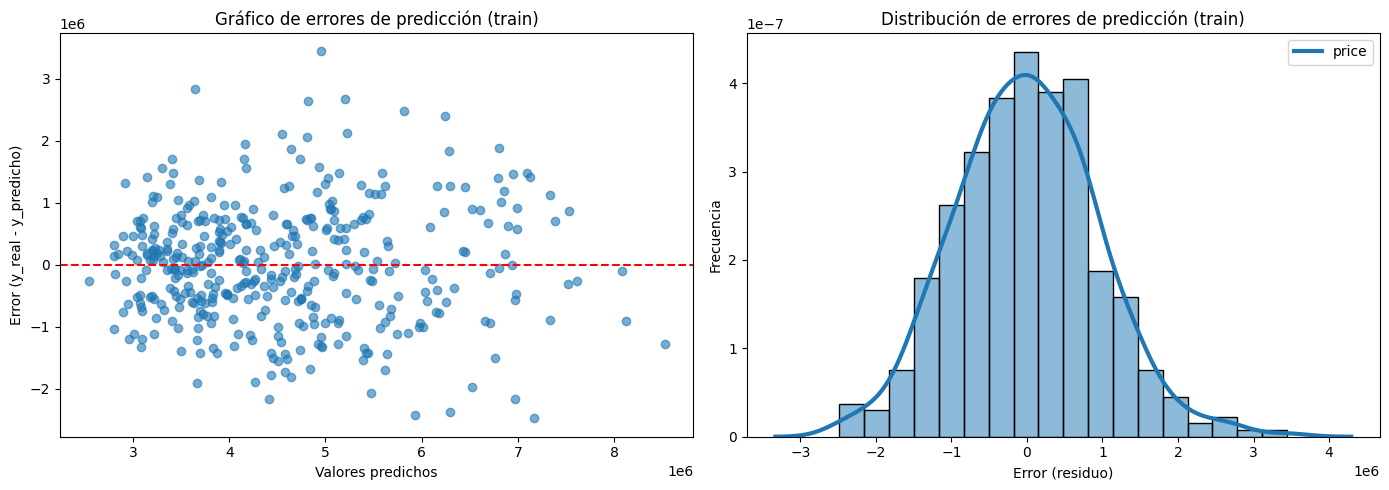

In [104]:
def plot_residuals(_y_test, _y_pred, _title1, _title2):
  # Calcular los errores
  errores = _y_test - _y_pred

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  # Crear el gráfico
  axes[0].scatter(_y_pred, errores, alpha=0.6)
  axes[0].axhline(y=0, color='red', linestyle='--')  # Línea horizontal en cero
  axes[0].set_xlabel("Valores predichos")
  axes[0].set_ylabel("Error (y_real - y_predicho)")
  axes[0].set_title(_title1)

  sns.histplot(data=errores, kde=False, stat='density', ax=axes[1])
  sns.kdeplot(data=errores, color='tomato', lw=3, ax=axes[1])
  axes[1].set_xlabel("Error (residuo)")
  axes[1].set_ylabel("Frecuencia")
  axes[1].set_title(_title2)

  plt.tight_layout()
  plt.show()

plot_residuals(y_train, y_pred_train, "Gráfico de errores de predicción (train)", "Distribución de errores de predicción (train)")

In [105]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Metricas con conjunto de prueba:')
print(f"MSE (test): {mse:.3f}")
print(f"R² (test): {r2:.3f}")

Metricas con conjunto de prueba:
MSE (test): 1092377207588.593
R² (test): 0.625


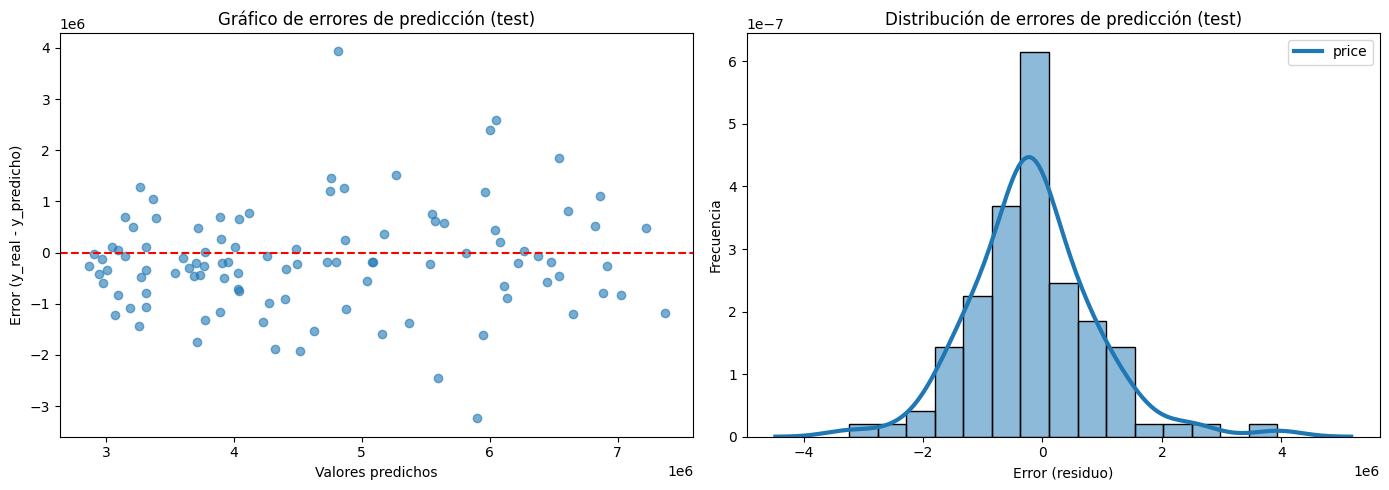

In [106]:
plot_residuals(y_test, y_pred, "Gráfico de errores de predicción (test)", "Distribución de errores de predicción (test)")

Conclusión:

El modelo presenta un buen ajuste y capacidad de generalización:

- En el entrenamiento, explica el 61 % de la variabilidad del precio (R² = 0.610) con un error medio cuadrático (MSE) de aprox 8.83 x 10^11, lo que indica una predicción razonablemente precisa sobre los datos vistos.

- En el conjunto de prueba, el R² aumenta ligeramente a 0.625, con un MSE de 1.09 x 10^12 (mayor que el de entrenamiento), lo que sugiere que no hay sobreajuste y el modelo mantiene un rendimiento similar en datos nuevos (generalización).